In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization, Dropout
from keras.optimizers import RMSprop, Adam
import keras

Using TensorFlow backend.


## Image Augmentation

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   brightness_range=[1.0,2.0])


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255, 
                                  shear_range=0.2, 
                                  zoom_range=0.2, 
                                  horizontal_flip=True)

In [5]:
train_set= train_datagen.flow_from_directory(r"D:\Datasets for project\tomato\train", target_size=(128,128),
                                            batch_size=64, class_mode="categorical")

test_set= train_datagen.flow_from_directory(r"D:\Datasets for project\tomato\val", target_size=(128,128),
                                            batch_size=64, class_mode="categorical")

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [6]:
train_set.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [7]:
test_set.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

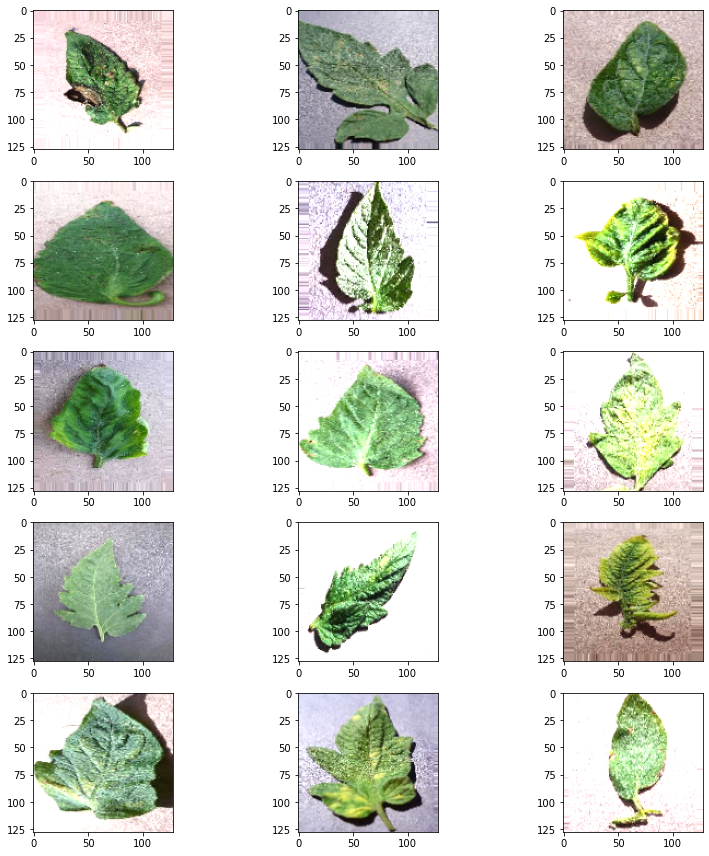

In [8]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_set:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## CNN Model

In [9]:
model= Sequential()
model.add(Conv2D(32,(3,3), activation="relu", input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation="relu"))
# model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

In [10]:
model.compile(optimizer=Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 128)      

## Model Fit

In [11]:
class MyThresholdCallback(keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

my_callback = MyThresholdCallback(threshold=0.8)

In [10]:
hist=model.fit_generator(
        train_set,
        epochs=15,
        validation_data=test_set, callbacks=[my_callback])

Epoch 1/15
157/157 [==============================] - 278s 2s/step - loss: 1.8918 - accuracy: 0.4138 - val_loss: 2.1506 - val_accuracy: 0.2370
Epoch 2/15
157/157 [==============================] - 285s 2s/step - loss: 0.9337 - accuracy: 0.6725 - val_loss: 2.1475 - val_accuracy: 0.2970
Epoch 3/15
157/157 [==============================] - 289s 2s/step - loss: 0.7955 - accuracy: 0.7266 - val_loss: 1.0798 - val_accuracy: 0.5930
Epoch 4/15
157/157 [==============================] - 288s 2s/step - loss: 0.6630 - accuracy: 0.7711 - val_loss: 0.9561 - val_accuracy: 0.6310
Epoch 5/15
157/157 [==============================] - 282s 2s/step - loss: 0.6031 - accuracy: 0.7866 - val_loss: 2.3700 - val_accuracy: 0.5390
Epoch 6/15
157/157 [==============================] - 275s 2s/step - loss: 0.5792 - accuracy: 0.7985 - val_loss: 0.7345 - val_accuracy: 0.7550
Epoch 7/15
157/157 [==============================] - 276s 2s/step - loss: 0.5279 - accuracy: 0.8154 - val_loss: 1.1572 - val_accuracy: 0.6500

## Evaluation

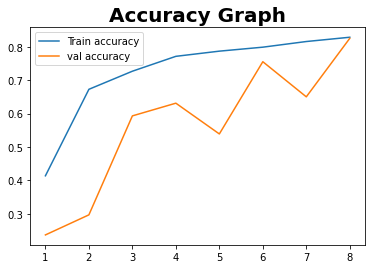

In [43]:
plt.plot(range(1,9),hist.history["accuracy"], label="Train accuracy")
plt.plot(range(1,9),hist.history["val_accuracy"] , label="val accuracy")
plt.title("Accuracy Graph",fontdict={'fontsize': 20,
        }, weight="bold")
plt.legend()
plt.show()

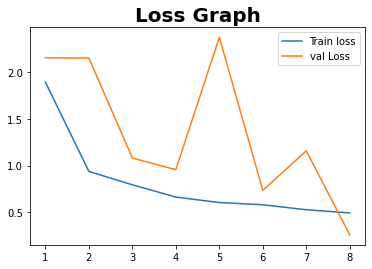

In [44]:
plt.plot(range(1,9),hist.history["loss"], label="Train loss")
plt.plot(range(1,9),hist.history["val_loss"], label="val Loss")
plt.title("Loss Graph",fontdict={'fontsize': 20,
        }, weight="bold")
plt.legend()
plt.show()

## Predicting new images

In [29]:
from keras.preprocessing import image
l1=[1,2,3,11,12,13,21,22,23,31,32,33,41,42,43,51,52,53,61,62,63,71,72,73,81,82,83,91,92,93]
for i in l1:
    new_image= image.load_img(r"D:\Datasets for project\tomato\val\New folder\{}.JPG".format(i), target_size=(128,128))
    new_image= image.img_to_array(new_image)
    new_image= np.expand_dims(new_image, axis=0)
    output= model.predict(new_image)
    # print(output)
    print(list(train_set.class_indices.keys())[np.argmax(output)])

Tomato___Early_blight
Tomato___Bacterial_spot
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Early_blight
Tomato___Septoria_leaf_spot
Tomato___healthy
Tomato___healthy
Tomato___healthy
Tomato___Late_blight
Tomato___Late_blight
Tomato___healthy
Tomato___Septoria_leaf_spot
Tomato___Septoria_leaf_spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Septoria_leaf_spot
Tomato___Septoria_leaf_spot
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___healthy
Tomato___healthy
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_mosaic_virus
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus
